# Demo 1: Plot everything from a specific period

In [1]:
import numpy as np
import cv2
import scipy.stats

import matplotlib.pyplot as plt

import os
import sys
sys.path.append('..')

import image_measures
import visual_plot

In [2]:
# path to your wikiart images folder
wikiart_path = '/media/sam/bbdb3901-f357-4a4f-b198-3102f6046fab/wikiart/images/'

In [3]:
target_years = set(range(1415, 1500))

In [4]:
image_paths = []
years = []
names = []
for path in os.listdir(wikiart_path):
    for year_folder in os.listdir(os.path.join(wikiart_path, path)):
        if year_folder != 'unknown-year' and int(year_folder) in target_years:
            
            subdir = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(os.path.join(wikiart_path, path, year_folder))) for f in fn]
            images = [s for s in subdir if s.split('.')[-1] in ('jpg', 'gif', 'png')]
            image_paths += images
            years += [i.split('/')[-2] for i in images]
            names += [i.split('/')[-3] for i in images]
print(len(image_paths), 'images found')

2533 images found


In [5]:
# compute colorfulness and complexity scores for the images we've selected

colorfulness = []
complexity = []
for i,image_path in enumerate(image_paths):
    try:
        colorfulness.append(image_measures.colorfulness(cv2.imread(image_path)))
        complexity.append(image_measures.complexity(cv2.imread(image_path)))
    except Exception as e:
        print(e)
        print(image_path)
        colorfulness.append(np.nan)
        complexity.append(np.nan)

OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/media/sam/bbdb3901-f357-4a4f-b198-3102f6046fab/wikiart/images/filippo-brunelleschi/1428/230939.jpg


In [6]:
colorfulness = np.array(colorfulness)
complexity = np.array(complexity)
years = np.array(years)
names = np.array(names)

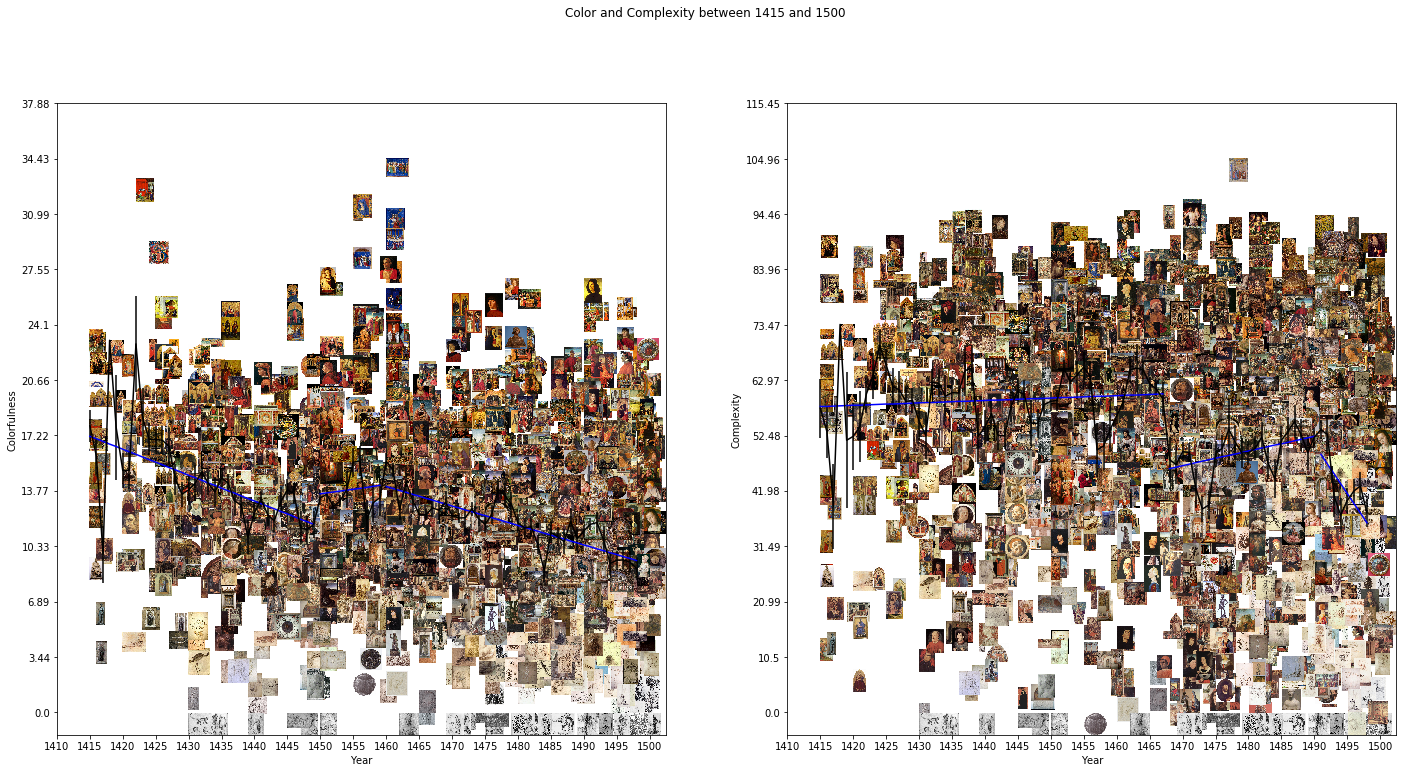

In [7]:
# filter out nan and unknown-year
mask = (years != 'unknown-year') & ~np.isnan(colorfulness)
years_no_nan = np.array([int(y) for y in np.array(years)[mask]])
colorfulness_no_nan = colorfulness[mask]
complexity_no_nan = complexity[mask]
image_paths_no_nan = np.array(image_paths)[mask]

# plot with 50px images
fig, ax = plt.subplots(1,2, figsize=(24,12))
visual_plot.visual_plot(years_no_nan, colorfulness_no_nan, image_paths_no_nan, ax=ax[0], target_image_resolution=50)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Colorfulness')
visual_plot.visual_plot(years_no_nan, complexity_no_nan, image_paths_no_nan, ax=ax[1], target_image_resolution=50)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Complexity')
plt.suptitle('Color and Complexity between 1415 and 1500')
plt.show()